## **TASK 1 : Prediction Using Supervised ML**

## **Made By : Tanmay Ranjan**

## **THE SPARKS FOUNDATION**
## **(Data Science and Business Analytics Intern)**

In this task, we are going to work on Student data where it is given to us - how many hours student has studied and we require to predict student's percentage based on it with the help of ML Algorithms.

### **Importing the libraries**

In [1]:
#Importing the necessary libraries for our task.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline  

### **Importing the Dataset**

In [2]:
#Loading the dataset to work upon.
df = pd.read_csv('Student_Study_Data.csv')

In [3]:
df.head() #First 5 columns of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info() #Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


 Data have 2 columns - Hours and Scores

Hours - It represent how many hours a student study.

Scores - It shows that how much student scored based upon how much they studied.

In [5]:
df.shape # Shape of the data

(25, 2)

### **DATA PREPROCESSING**
Now we are moving forward to preprocess our data and making it ready.

**Null values in data.**

In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

 As it has no null values then no need to impute and drop value.

**Duplicate Values in the data**

In [7]:
df[df.duplicated()] 

,Hours,Scores


In [8]:
df.describe()      #Checking the statistics of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


An interesting insight about the data.
1. As observed mean is 5 for Hours and 51 for Scores which shows the average student 's study.
2. Also noticed a huge transition in scores as the hours increase like minimum for score is 17 and hour is 1, but maximum is 95 for 9 hours.  
3. Mean is greater than median in data.

### **Outliers in data with the help of Boxplot**

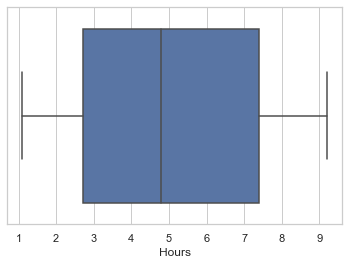

In [9]:
sea.set(style="whitegrid")
ax = sea.boxplot(x=df["Hours"])

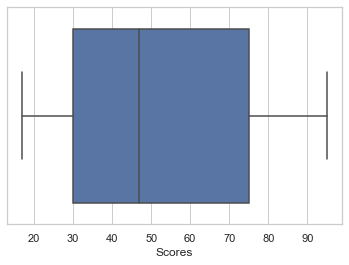

In [10]:
sea.set(style="whitegrid")
ax = sea.boxplot(x=df["Scores"])

There are no outliers present in the data.

### **Normal Distribution of Data**

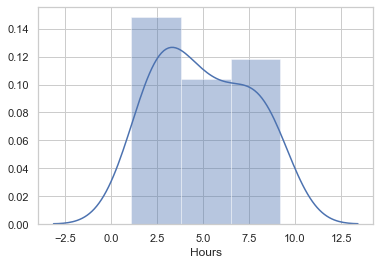

In [11]:
sea.distplot(df['Hours'])

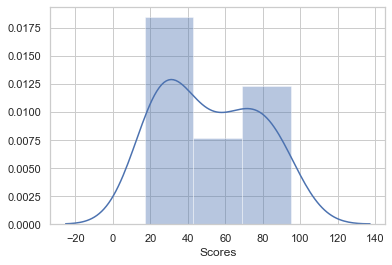

In [12]:
sea.distplot(df['Scores'])

Hours and Scores are quite normally distribute but are slightly right skewed.

Text(0, 0.5, 'Percentage')

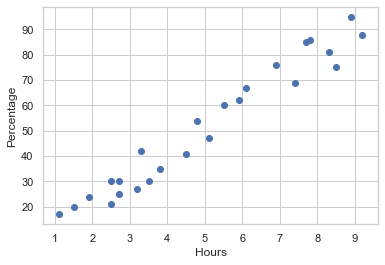

In [13]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Percentage')

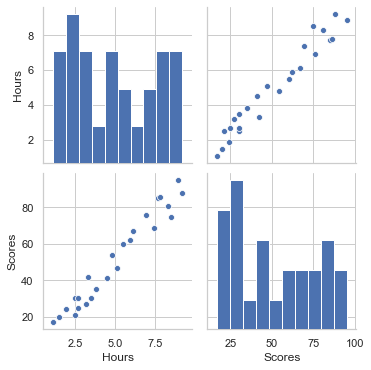

In [14]:
sea.pairplot(df)

With the help of pairplot, it is noticable that scores and hours are linearly dependent.
To be more sure about it, let's move on to see correlation between them.

In [15]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


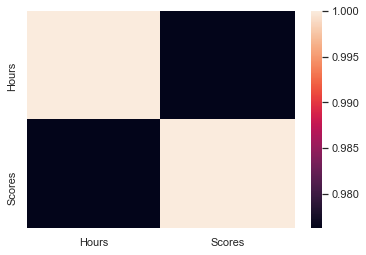

In [16]:
sea.heatmap(df.corr())

Scores and Hours shows correlation of **0.976** which lead to conclusion that they are highly correlated.

**Spliting of DATA in Train and Test**

In [17]:
x = df.drop('Scores',axis=1)

In [18]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [19]:
y = df.drop('Hours',axis = 1)

In [20]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 17)

**Linear Regression Model**

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
LR = LinearRegression()

In [23]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = LR.predict(x_test)

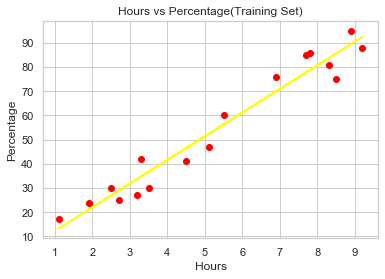

In [25]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, LR.predict(x_train), color = 'yellow')
plt.title('Hours vs Percentage(Training Set)')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

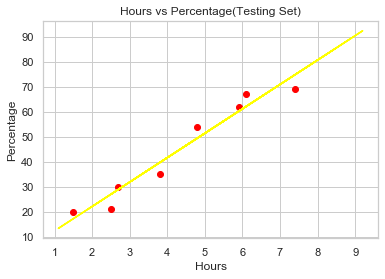

In [26]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, LR.predict(x_train), color = 'yellow')
plt.title('Hours vs Percentage(Testing Set)')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [27]:
print(LR.coef_)

[[9.77334064]]


In [28]:
print(LR.intercept_)

[2.56090226]


In [29]:
y_pred = np.ravel(y_pred)

In [30]:
#Comparing Actual vs Predicted
Ap= pd.DataFrame({'Actual': y_test['Scores'], 'Predicted': y_pred})  
Ap

,Actual,Predicted
20,30,28.948922
0,21,26.994254
18,67,62.178280
19,69,74.883623
5,20,17.220913
11,62,60.223612
21,54,49.472937
22,35,39.699597


**Evaluating the Model**

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test['Scores'], y_pred))
print('MSE:', metrics.mean_squared_error(y_test['Scores'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test['Scores'], y_pred)))

MAE: 3.9416011054125395
MSE: 18.545153623454564
RMSE: 4.306408436673717


In [32]:
LR.score(x_train,y_train)

0.9516091323831719

In [33]:
LR.score(x_test,y_test)

0.9498016481178696

**Predicting the Score for 9.25 Hours/day study.**

In [34]:
LR.predict([[9.25]])

array([[92.96430314]])

Score is : 92.96